In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="Verdana")
# Remove the gray background grid
sns.set_style("white")
import warnings
warnings.simplefilter(action='ignore')
from wordcloud import WordCloud

In [2]:
df_product = pd.read_csv("../csvs/product.csv")
df_process = pd.read_csv("../csvs/process.csv")

In [3]:
df_process["mean_flexibility"] = (df_process["flexibility (manually)"] + df_process["flexibility (categories)"]) / 2
df_process.loc[df_process["creator"] == "adult", "age"] = 18
df_process["age_group"] = df_process["age"].apply(
    lambda age: "early childhood" if age in [4, 5, 6] else ("middle childhood" if age in [7, 8, 9] else "adult"))
df_product["age_group"] = df_product["age"].apply(
    lambda age: "early childhood" if age in [4, 5, 6] else ("middle childhood" if age in [7, 8, 9] else "adult"))

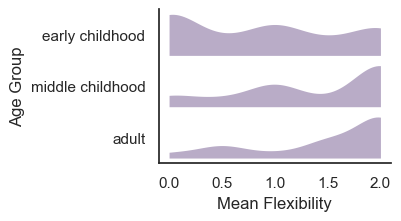

In [4]:
df_process['dummy_hue'] = 'dummy'

plt.figure(figsize=(3, 2))

# Create a one-sided violin plot with density only above the line
sns.violinplot(
    x="mean_flexibility", 
    y="age_group", 
    data=df_process, 
    scale="width", 
    inner=None, 
    linewidth=0, 
    cut=0, 
    bw=0.35, 
    split=True,
    hue='dummy_hue',  # Use the dummy hue to split the violin
    palette=["#b9a7cc"]  # Set your desired color here
)

# Overlay the data points to add clarity
# sns.stripplot(x="mean_flexibility", y="age_group", data=df_process, color='k', alpha=0.5, jitter=True)

# Customize the x-axis ticks to be at intervals of 0.5
xticks = np.arange(df_process["mean_flexibility"].min(), df_process["mean_flexibility"].max() + 0.5, 0.5)
plt.xticks(xticks)

# Set labels and title
plt.xlabel('Mean Flexibility')
plt.ylabel('Age Group')

# Adjust the plot to make it more visually appealing
sns.despine(right=True)  # Removes the left spine for a cleaner look
plt.grid(False)
plt.legend().remove()  # Remove the legend created by the dummy hue
plt.show()


In [5]:
df_product

,ID,creator,age,stim,inverted,category1,category2,category3,confidence,creativity,filepath,age_group
0,1001,child,5.0,G,True,princess,heart,writing,2.0,3,../data/children/stimuli_G/1001.png,early childhood
1,1001,child,5.0,I,False,ninja(s),house,door,2.0,3.0,../data/children/stimuli_I/1001.png,early childhood
2,1001,child,5.0,R,False,ninja(s),house,door,2.0,3.0,../data/children/stimuli_R/1001.png,early childhood
3,1002,child,5.0,G,False,creature/monster,circles,frown,2.0,2,../data/children/stimuli_G/1002.png,early childhood
4,1002,child,5.0,I,True,creature/monster,hands,NaN,2.0,3.0,../data/children/stimuli_I/1002.png,early childhood
...,...,...,...,...,...,...,...,...,...,...,...,...
538,A89,adult,NaN,I,False,house,door,path,2.0,2.0,../data/adults/stimuli_I/A89.png,adult
539,A89,adult,NaN,R,False,abstract doodle/hard to interpret,NaN,NaN,1.0,1.0,../data/adults/stimuli_R/A89.png,adult
540,A105,adult,NaN,G,False,doughnut,NaN,NaN,2.0,3,../data/adults/stimuli_G/A105.png,adult
541,A105,adult,NaN,I,False,door,steps,NaN,2.0,3.0,../data/adults/stimuli_I/A105.png,adult


In [6]:
df_product = df_product[df_product["creativity"] != " "]

In [7]:
df_product["creativity"] = df_product["creativity"].astype(float)

In [8]:
df_product[["age_group", "creativity"]].groupby("age_group").mean()

,creativity
age_group,
adult,2.818182
early childhood,1.944223
middle childhood,2.005208


In [9]:
age_group_to_themes = df_product.groupby("age_group").agg(list)["category1"].to_dict()

In [10]:
age_group_to_themes["adult"]

['abstract doodle/hard to interpret',
 'abstract doodle/hard to interpret',
 'person(s)',
 'arrow',
 'cupcake',
 'person(s)',
 'house',
 'abstract doodle/hard to interpret',
 'house',
 'person(s)',
 'completing',
 'abstract doodle/hard to interpret',
 '(smiley) face',
 'gravestone',
 'garage',
 'umbrella',
 'house',
 'animal',
 'waterpark',
 'house',
 'label',
 'boat',
 'abstract doodle/hard to interpret',
 'abstract doodle/hard to interpret',
 'sunset',
 'person(s)',
 'person(s)',
 'person(s)',
 'house',
 'abstract doodle/hard to interpret',
 'palm tree',
 'robot',
 'person(s)',
 'umbrella',
 'robot',
 'person(s)',
 'completing',
 'abstract doodle/hard to interpret',
 'abstract doodle/hard to interpret',
 'mushroom',
 'window',
 'fish',
 'sunset',
 'abstract doodle/hard to interpret',
 'flowers',
 'person(s)',
 'house ',
 'coffeemachine',
 'blank',
 'creature/monster',
 'abstract doodle/hard to interpret',
 'animal',
 'abstract doodle/hard to interpret',
 'completing',
 'cat',
 'churc

In [11]:
age_group_to_themes["early childhood"]

['princess',
 'ninja(s)',
 'ninja(s)',
 'creature/monster',
 'creature/monster',
 'ninja(s)',
 'princess',
 'creature/monster',
 'abstract doodle/hard to interpret',
 '(smiley) face',
 'abstract doodle/hard to interpret',
 'house',
 '(smiley) face',
 'creature/monster',
 'house',
 'abstract doodle/hard to interpret',
 'house',
 'abstract doodle/hard to interpret',
 'house',
 'door',
 'baby',
 'person(s)',
 'person',
 'abstract doodle/hard to interpret',
 'person',
 '(smiley) face',
 'house',
 'creature/monster',
 'abstract doodle/hard to interpret',
 'abstract doodle/hard to interpret',
 'person(s)',
 'completing',
 'house',
 'house',
 'completing',
 'completing',
 'person',
 'person',
 'abstract doodle/hard to interpret',
 'creature/monster',
 'abstract doodle/hard to interpret',
 'creature/monster',
 'mushroom',
 'house',
 'abstract doodle/hard to interpret',
 'person',
 'popsicle',
 'house',
 'abstract doodle/hard to interpret',
 'creature/monster',
 'completing',
 'completing',
 'p

In [34]:
age_group_to_themes["middle childhood"]

['(smiley) face',
 'abstract doodle/hard to interpret',
 'house',
 'abstract doodle/hard to interpret',
 'abstract doodle/hard to interpret',
 'abstract doodle/hard to interpret',
 'abstract doodle/hard to interpret',
 'house',
 'completing',
 '(smiley) face',
 'angel',
 'house',
 'mushroom',
 'house',
 'baby',
 'mushroom',
 'abstract doodle/hard to interpret',
 'popcorn',
 'abstract doodle/hard to interpret',
 '(smiley) face',
 'ice cream cone',
 'abstract doodle/hard to interpret',
 'hat',
 'creature/monster',
 'mushroom',
 'milk karton',
 'shopping bag',
 'creature/monster',
 'door',
 'house',
 'person(s)',
 'creature/monster',
 '(smiley) face',
 'completing',
 'completing',
 'house',
 'abstract doodle/hard to interpret',
 'toilet',
 'house',
 'creature/monster',
 'creature/monster',
 '(smiley) face',
 'abstract doodle/hard to interpret',
 'robot',
 'robot',
 'abstract doodle/hard to interpret',
 'bank',
 'house',
 'person',
 'person',
 'house',
 'person(s)',
 'abstract doodle/hard 

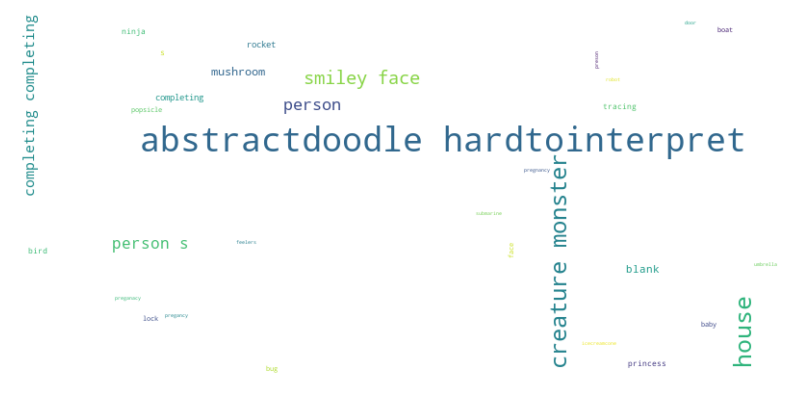

In [20]:
early_childhood_themes = " ".join(text.replace(" ", "") for text in age_group_to_themes["early childhood"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(early_childhood_themes)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

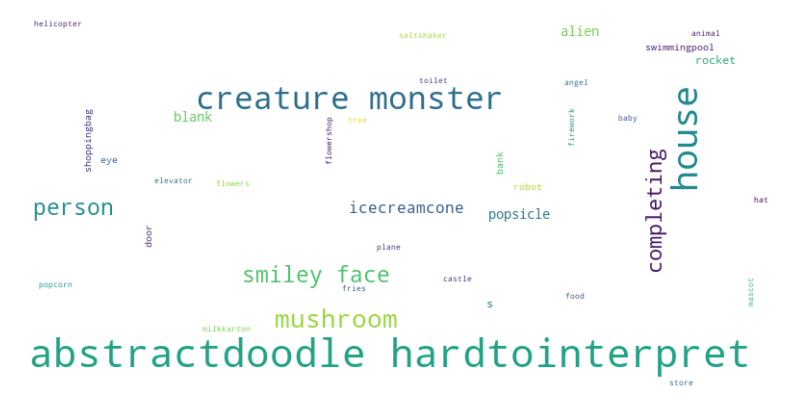

In [21]:
middle_childhood_themes = " ".join(text.replace(" ", "") for text in age_group_to_themes["middle childhood"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(middle_childhood_themes)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
print(len(df_product[(df_product["creator"] == "child") & (df_product["inverted"])]),
len(df_product[(df_product["creator"] == "child") & (~df_product["inverted"])]),
len(df_product[(df_product["creator"] == "adult") & (df_product["inverted"])]),
len(df_product[(df_product["creator"] == "adult") & (~df_product["inverted"])]))

140 303 0 99


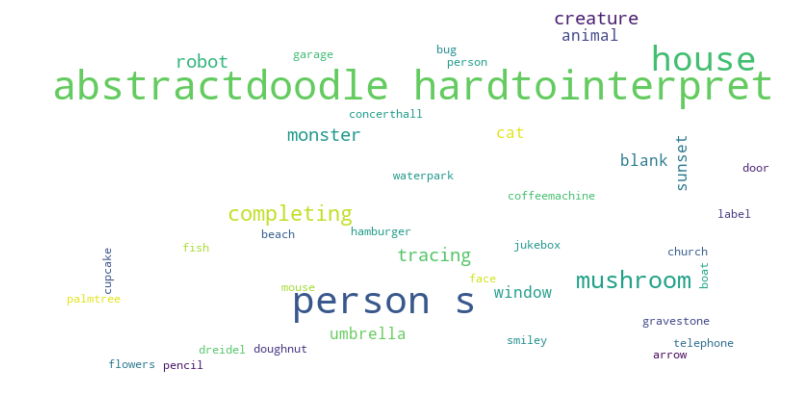

In [22]:
adult_themes = " ".join(text.replace(" ", "") for text in age_group_to_themes["adult"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(adult_themes)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()